In [3]:
import pandas as pd

In [4]:
star_data = pd.read_csv("HTRU_2.csv", names=["mean_int_prof","std_int_prof","excess_kurtosis_int_prof","skewness_int_prof","mean_dm_snr",
                                            "std_dm_snr","excess_kurtosis_dm_snr","skewness_dm_snr","class"],index_col=False)

star_data.head()

In [5]:
star_data.head()

,mean_int_prof,std_int_prof,excess_kurtosis_int_prof,skewness_int_prof,mean_dm_snr,std_dm_snr,excess_kurtosis_dm_snr,skewness_dm_snr,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline



In [7]:
attributes = list(star_data.columns.values)
attributes.remove("class")

X = star_data[attributes]
y = star_data['class']
for col in attributes:
    col_min = star_data[col].min()
    col_max =  star_data[col].max()
    
    X[col] = (X[col]-col_min)/col_max

C:\Users\Matt\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=26)

In [9]:
from sklearn import tree
from sklearn.model_selection import validation_curve

In [10]:
train_scores, test_scores = validation_curve(estimator=tree.DecisionTreeClassifier(), X=X_train, y=y_train, param_name="max_depth",
                                            param_range =range(1,20), cv=5)

In [11]:
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

In [12]:
train_scores[0]

array([ 0.97784873,  0.97834764,  0.97794851,  0.97805048,  0.97815025])

(0.95, 1.01)

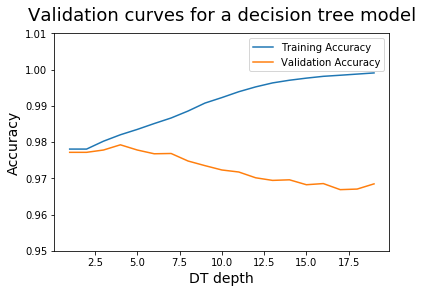

In [13]:
plt.plot(range(1,20), train_scores_mean, label = 'Training Accuracy')
plt.plot(range(1,20), test_scores_mean, label = 'Validation Accuracy')
#plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
#                 alpha=0.1, color="b")
#plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
#                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('DT depth', fontsize = 14)
plt.title('Validation curves for a decision tree model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.95,1.01)

In [14]:
from sklearn.model_selection import GridSearchCV

GSmodel = GridSearchCV(estimator = tree.DecisionTreeClassifier(),param_grid={"max_depth":range(1,100)}, cv=5)

In [15]:
GSmodel.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 100)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [18]:
GSmodel.best_params_

{'max_depth': 4}

In [20]:
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, learn_train_scores, learn_test_scores = learning_curve(GSmodel,X_train, y_train,train_sizes= np.linspace(.1,1,10), cv=5)

In [21]:
learn_train_mean = learn_train_scores.mean(axis=1)
learn_test_mean = learn_test_scores.mean(axis=1)

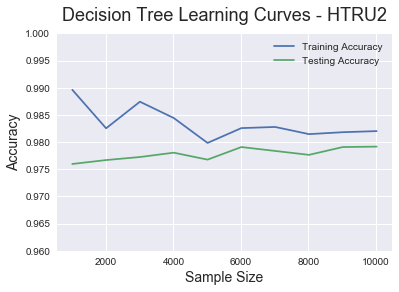

In [45]:
plt.plot(train_sizes, learn_train_mean, label = 'Training Accuracy')
plt.plot(train_sizes, learn_test_mean, label = 'Testing Accuracy')
#plt.fill_between(train_sizes, train_scores_avg - train_scores_std, train_scores_avg + train_scores_std, 
#                 alpha=0.1, color="b")
#plt.fill_between(train_sizes, test_scores_avg - test_scores_std, test_scores_avg + test_scores_std, 
#                 alpha=0.1, color="g")

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Sample Size', fontsize = 14)
plt.title('Decision Tree Learning Curves - HTRU2', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.96,1.0)
plt.savefig("HTRU_DT_LC.png")

In [23]:
y_pred = GSmodel.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.97746741154562389

In [25]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test, y_pred)

array([[4855,   34],
       [  87,  394]], dtype=int64)

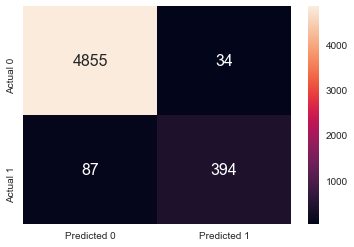

In [46]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

      
df_cm = pd.DataFrame(conf_mat, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g',xticklabels=['Predicted 0','Predicted 1'], yticklabels=['Actual 0','Actual 1'])# font size

plt.savefig("HTRU_DT_conf_mat.png")

<img src="DT_complexity_curve.png">